In [2352]:
import pandas as pd

# Étude du fichier EdStatsCountry-Series.csv

## Partie 1 : Analyse générale des données

### Fichier 1

In [2353]:
df = pd.read_csv('EdStatsCountry-Series.csv')

In [2354]:
df.head(5)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [2355]:
df.shape

(613, 4)

Le fichier contient fichier 613 lignes et 4 colonnes.

In [2356]:
df.isnull().mean()

CountryCode    0.0
SeriesCode     0.0
DESCRIPTION    0.0
Unnamed: 3     1.0
dtype: float64

La colonne 'Unnamed: 3' est vide.
Il ne manque aucune donnée dans les autres colonnes

In [2357]:
country_series = df

### Fichier 2

In [2358]:
df = pd.read_csv('EdStatsCountry.csv')

In [2359]:
df.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [2360]:
df.shape

(241, 32)

Le fichier contient fichier 241 lignes et 32 colonnes.

In [2361]:
mean_null_by_columns_df = df.isnull().mean()
mean_null_by_columns_df

Country Code                                         0.000000
Short Name                                           0.000000
Table Name                                           0.000000
Long Name                                            0.000000
2-alpha code                                         0.012448
Currency Unit                                        0.107884
Special Notes                                        0.398340
Region                                               0.112033
Income Group                                         0.112033
WB-2 code                                            0.004149
National accounts base year                          0.149378
National accounts reference year                     0.867220
SNA price valuation                                  0.182573
Lending category                                     0.402490
Other groups                                         0.759336
System of National Accounts                          0.107884
Alternat

In [2362]:
columns_with_no_null = mean_null_by_columns_df[mean_null_by_columns_df == 0.0]
columns_with_no_null

Country Code    0.0
Short Name      0.0
Table Name      0.0
Long Name       0.0
dtype: float64

Aucune données n'est manquante dans les colonnes ci-dessus

In [2363]:
columns_with_only_null = mean_null_by_columns_df[mean_null_by_columns_df == 1.0]
columns_with_only_null

Unnamed: 31    1.0
dtype: float64

La colonne ci-dessus est vide

In [2364]:
countries = df

### Fichier 3

In [2365]:
df = pd.read_csv('EdStatsData.csv')

In [2366]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [2367]:
df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2368]:
df.shape

(886930, 70)

Le fichier contient fichier 886 930 lignes et 70 colonnes.

In [2369]:
mean_null_by_columns_df = df.isnull().mean()
mean_null_by_columns_df

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1970              0.918496
1971              0.959933
1972              0.959840
1973              0.959924
1974              0.959715
1975              0.901564
1976              0.957738
1977              0.957636
1978              0.957634
1979              0.958498
1980              0.899516
1981              0.956280
1982              0.957707
1983              0.956637
1984              0.956472
1985              0.898193
1986              0.955609
1987              0.956433
1988              0.956533
1989              0.957674
1990              0.859735
1991              0.916073
1992              0.914826
1993              0.914545
1994              0.912663
1995              0.851892
1996              0.913401
1997              0.917183
1998              0.904261
1999              0.866011
2000              0.800801
2001              0.860745
2002              0.859961
2

In [2370]:
columns_with_no_null = mean_null_by_columns_df[mean_null_by_columns_df == 0.0]
columns_with_no_null

Country Name      0.0
Country Code      0.0
Indicator Name    0.0
Indicator Code    0.0
dtype: float64

Aucune données n'est manquante dans les colonnes ci-dessus

In [2371]:
columns_with_only_null = mean_null_by_columns_df[mean_null_by_columns_df == 1.0]
columns_with_only_null

Unnamed: 69    1.0
dtype: float64

La colonne ci-dessus est vide

In [2372]:
stats = df

### Fichier 4

In [2373]:
df = pd.read_csv('EdStatsFootNote.csv')

In [2374]:
df.head(5)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [2375]:
df.shape

(643638, 5)

Le fichier contient fichier 643638 lignes et 5 colonnes.

In [2376]:
mean_null_by_columns_df = df.isnull().mean()
mean_null_by_columns_df

CountryCode    0.0
SeriesCode     0.0
Year           0.0
DESCRIPTION    0.0
Unnamed: 4     1.0
dtype: float64

In [2377]:
columns_with_no_null = mean_null_by_columns_df[mean_null_by_columns_df == 0.0]
columns_with_no_null

CountryCode    0.0
SeriesCode     0.0
Year           0.0
DESCRIPTION    0.0
dtype: float64

Aucune données n'est manquante dans les colonnes ci-dessus

In [2378]:
columns_with_only_null = mean_null_by_columns_df[mean_null_by_columns_df == 1.0]
columns_with_only_null

Unnamed: 4    1.0
dtype: float64

La colonne ci-dessus est vide

In [2379]:
foot_note = df

### Fichier 5

In [2380]:
df = pd.read_csv('EdStatsSeries.csv')

In [2381]:
df.head(5)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2382]:
df.shape

(3665, 21)

Le fichier contient fichier 3665 lignes et 21 colonnes.

In [2383]:
mean_null_by_columns_df = df.isnull().mean()
mean_null_by_columns_df

Series Code                            0.000000
Topic                                  0.000000
Indicator Name                         0.000000
Short definition                       0.411733
Long definition                        0.000000
Unit of measure                        1.000000
Periodicity                            0.972988
Base Period                            0.914325
Other notes                            0.849386
Aggregation method                     0.987176
Limitations and exceptions             0.996180
Notes from original source             1.000000
General comments                       0.996180
Source                                 0.000000
Statistical concept and methodology    0.993724
Development relevance                  0.999181
Related source links                   0.941337
Other web links                        1.000000
Related indicators                     1.000000
License Type                           1.000000
Unnamed: 20                            1

In [2384]:
columns_with_no_null = mean_null_by_columns_df[mean_null_by_columns_df == 0.0]
columns_with_no_null

Series Code        0.0
Topic              0.0
Indicator Name     0.0
Long definition    0.0
Source             0.0
dtype: float64

Aucune données n'est manquante dans les colonnes ci-dessus

In [2385]:
columns_with_only_null = mean_null_by_columns_df[mean_null_by_columns_df == 1.0]

Les colonnes ci-dessus sont vides

In [2386]:
series = df

## Partie 2 : Sélectionnez les données pertinentes

### Données prévisionnelles

In [2387]:
df = stats

In [2388]:
# Rename some columns
df.rename(columns={'Indicator Name' : 'indicator', 'Country Name': 'country'}, inplace = True)

In [2389]:
# Delete the last column
df = df.iloc[:, :-1]

In [2390]:
df.shape

(886930, 69)

In [2391]:
# Drop duplicated columns (here no columns were duplicated)
df.drop_duplicates(subset=["country", "indicator"], keep='first')
df.shape

(886930, 69)

In [2392]:
# Choose dimensions and years to use for the forecast
df = df[['country', 'indicator', "2025", "2030", "2035", "2040"]]

In [2393]:
# Regroup all years columns into one
df = pd.melt(df, id_vars=['country', 'indicator'], var_name="year", value_name="value")
df = df.sort_values(by=['country', 'indicator', 'year']).reset_index(drop=True)
df.head()

,country,indicator,year,value
0,Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",2025,NaN
1,Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",2030,NaN
2,Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",2035,NaN
3,Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",2040,NaN
4,Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",2025,NaN


In [2394]:
# Divide all values in indicator column to create new columns
df = df.pivot_table(index=['country', 'year'], columns='indicator', values='value', aggfunc='sum').reset_index()
# Renaming columns for clarity
df.columns.name = None
df.head()

,country,year,"Adjusted net enrolment rate, lower secondary, both sexes (%)","Adjusted net enrolment rate, lower secondary, female (%)","Adjusted net enrolment rate, lower secondary, gender parity index (GPI)","Adjusted net enrolment rate, lower secondary, male (%)","Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, gender parity index (GPI)","Adjusted net enrolment rate, primary, male (%)",...,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Male,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total,"Youth illiterate population, 15-24 years, % female","Youth illiterate population, 15-24 years, both sexes (number)","Youth illiterate population, 15-24 years, female (number)","Youth illiterate population, 15-24 years, male (number)","Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)"
0,Afghanistan,2025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,2030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,2035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Albania,2025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,649.76,1302.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2395]:
# Delete all values in the country column that are not countries
non_countries = [
    'Arab World',
    'East Asia & Pacific',
    'East Asia & Pacific (excluding high income)',
    'Euro area',
    'Europe & Central Asia',
    'Europe & Central Asia (excluding high income)',
    'European Union',
    'Heavily indebted poor countries (HIPC)',
    'High income',
    'Latin America & Caribbean',
    'Latin America & Caribbean (excluding high income)',
    'Least developed countries: UN classification',
    'Low & middle income',
    'Low income',
    'Lower middle income',
    'Middle East & North Africa',
    'Middle East & North Africa (excluding high income)',
    'Middle income',
    'North America',
    'OECD members',
    'South Asia',
    'Sub-Saharan Africa',
    'Sub-Saharan Africa (excluding high income)',
    'Upper middle income',
    'World'
 ]
df =  df[~df["country"].isin(non_countries)]

In [2396]:
# Delete countries with no data

df_grouped_by_country = df.groupby(['country']).sum().reset_index()
countries_with_no_data = []

# Iterate over each row in the DataFrame
for index, row in df_grouped_by_country.iterrows():
    # Check if all indicator columns are 0
    if (row.drop(['country', 'year']) == 0).all():
        countries_with_no_data.append(row['country'])

df =  df[~df["country"].isin(countries_with_no_data)]

In [2397]:
# Calculate for each columns the mean of values that equal to 0.
# Sort the result in order to select columns with a rate of 50% or less
zero_proportion = df.eq(0).mean().sort_values(ascending=True)

zero_proportion[zero_proportion < 0.5].head()

country                                                                                                                               0.0
Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Post Secondary. Male        0.0
Wittgenstein Projection: Percentage of the population age 25+ by highest level of educational attainment. Post Secondary. Female      0.0
Wittgenstein Projection: Percentage of the population age 20-64 by highest level of educational attainment. Upper Secondary. Total    0.0
Wittgenstein Projection: Percentage of the population age 20-64 by highest level of educational attainment. Upper Secondary. Male     0.0
dtype: float64

In [2398]:
forecast_dimensions = [
    'Wittgenstein Projection: Mean years of schooling. Age 15-19. Total',
    'Wittgenstein Projection: Mean years of schooling. Age 20-24. Total',
    'Wittgenstein Projection: Mean years of schooling. Age 25-29. Total',
    'Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total',
    'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total',
    'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total',
    'Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. Upper Secondary. Total',
    'Wittgenstein Projection: Population age 25-29 in thousands by highest level of educational attainment. Post Secondary. Total',

]
dimensions = ['country', 'year'] + forecast_dimensions

In [2399]:
df = df[dimensions]

<Axes: >

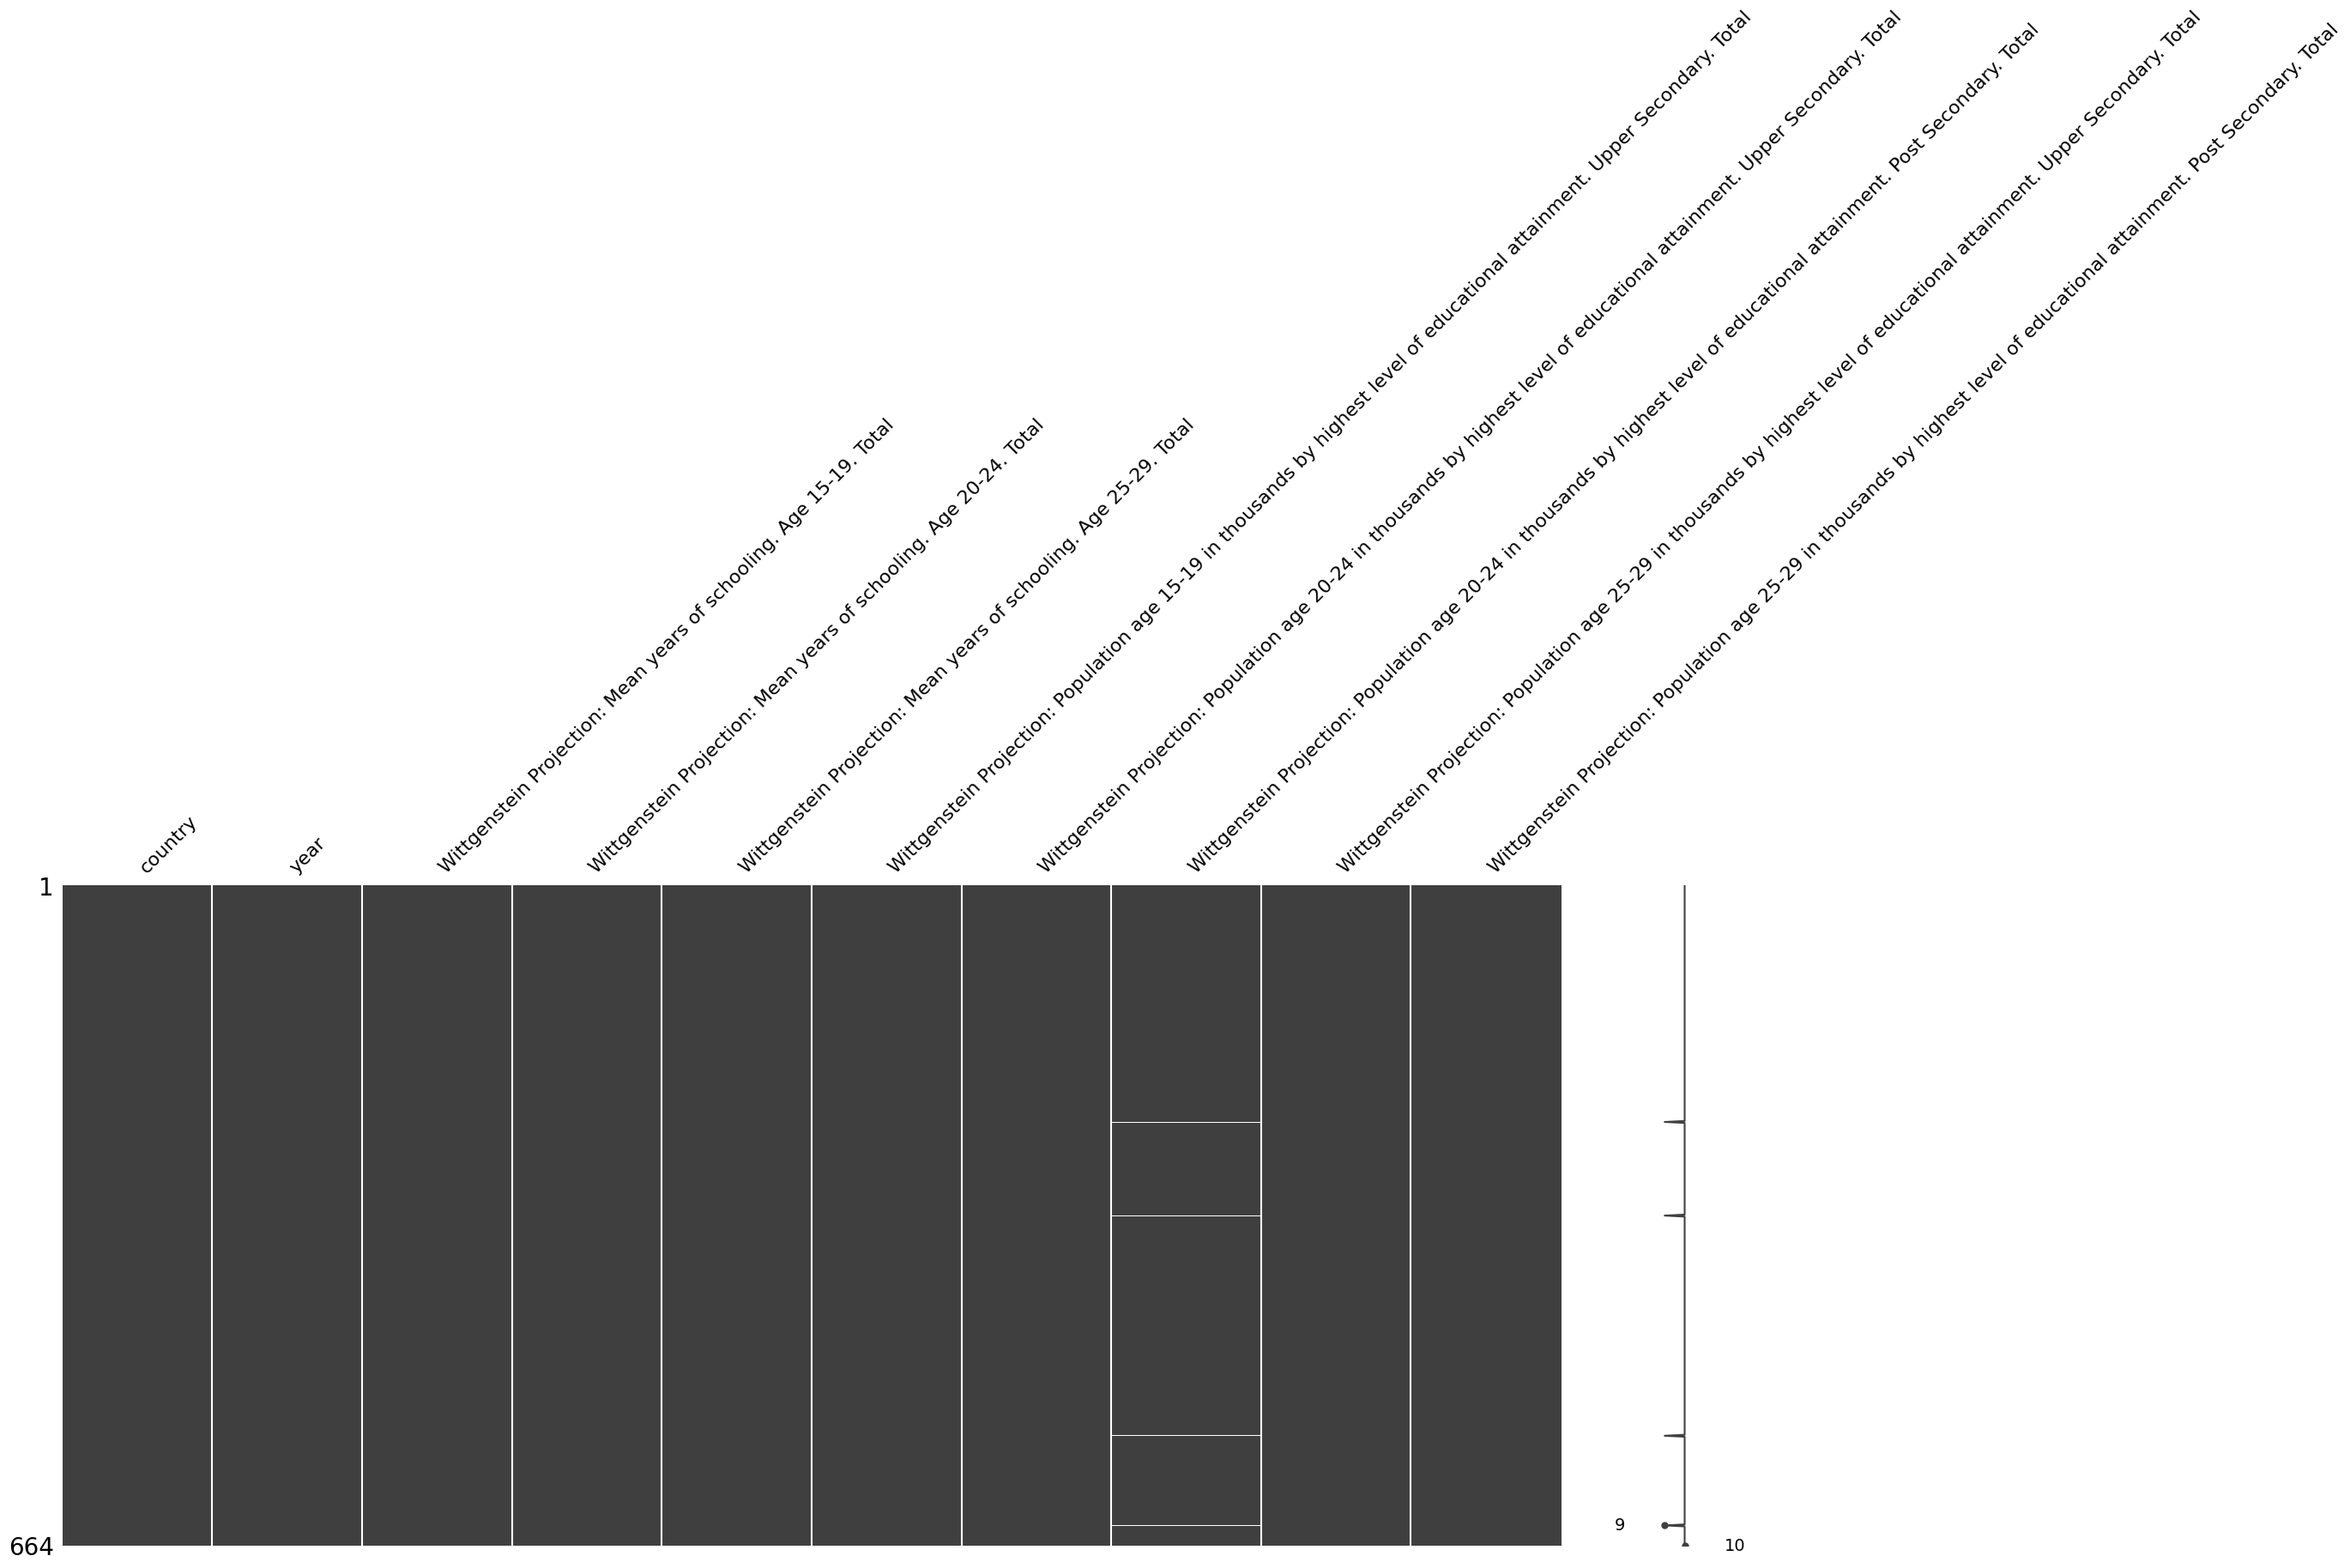

In [2400]:
import missingno as msno
import numpy as np
df.replace(0, np.nan, inplace=True)

%matplotlib inline
msno.matrix(df.sample(664))

### Données historiques

In [2401]:
df = stats

In [2402]:
# Rename some columns
df.rename(columns={'Indicator Name' : 'indicator', 'Country Name': 'country'}, inplace = True)

In [2403]:
# Delete the last column
df = df.iloc[:, :-1]

In [2404]:
df.shape

(886930, 69)

In [2405]:
# Drop duplicated columns (here no columns were duplicated)
df.drop_duplicates(subset=["country", "indicator"], keep='first')
df.shape

(886930, 69)

In [2406]:
# Choose dimensions and years to use for the forecast
df = df[['country', 'indicator', "2013", "2014", "2015", "2016"]]

In [2407]:
# Regroup all years columns into one
df = pd.melt(df, id_vars=['country', 'indicator'], var_name="year", value_name="value")
df = df.sort_values(by=['country', 'indicator', 'year']).reset_index(drop=True)

df = df[~df['indicator'].str.contains("Wittgenstein Projection")]

df.head()

,country,indicator,year,value
0,Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",2013,47.436790
1,Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",2014,50.627232
2,Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",2015,NaN
3,Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",2016,NaN
4,Afghanistan,"Adjusted net enrolment rate, lower secondary, ...",2013,34.073261


In [2408]:
# Divide all values in indicator column to create new columns
df = df.pivot_table(index=['country', 'year'], columns='indicator', values='value', aggfunc='sum').reset_index()
# Renaming columns for clarity
df.columns.name = None
df.head()

,country,year,"Adjusted net enrolment rate, lower secondary, both sexes (%)","Adjusted net enrolment rate, lower secondary, female (%)","Adjusted net enrolment rate, lower secondary, gender parity index (GPI)","Adjusted net enrolment rate, lower secondary, male (%)","Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, gender parity index (GPI)","Adjusted net enrolment rate, primary, male (%)",...,"Unemployment, male (% of male labor force)","Unemployment, total (% of total labor force)","Youth illiterate population, 15-24 years, % female","Youth illiterate population, 15-24 years, both sexes (number)","Youth illiterate population, 15-24 years, female (number)","Youth illiterate population, 15-24 years, male (number)","Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)"
0,Afghanistan,2013,47.436790,34.073261,0.56706,60.087059,0.000000,0.000000,0.00000,0.000000,...,7.500000,8.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,2014,50.627232,37.641541,0.59837,62.906952,0.000000,0.000000,0.00000,0.000000,...,7.700000,8.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,2015,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,7.700000,8.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2016,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,7.700000,8.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Albania,2013,87.666588,87.354607,0.99311,87.960289,95.912598,95.250214,0.98683,96.520988,...,17.299999,15.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2409]:
# Delete all values in the country column that are not countries
non_countries = [
    'Arab World',
    'East Asia & Pacific',
    'East Asia & Pacific (excluding high income)',
    'Euro area',
    'Europe & Central Asia',
    'Europe & Central Asia (excluding high income)',
    'European Union',
    'Heavily indebted poor countries (HIPC)',
    'High income',
    'Latin America & Caribbean',
    'Latin America & Caribbean (excluding high income)',
    'Least developed countries: UN classification',
    'Low & middle income',
    'Low income',
    'Lower middle income',
    'Middle East & North Africa',
    'Middle East & North Africa (excluding high income)',
    'Middle income',
    'North America',
    'OECD members',
    'South Asia',
    'Sub-Saharan Africa',
    'Sub-Saharan Africa (excluding high income)',
    'Upper middle income',
    'World'
 ]
df =  df[~df["country"].isin(non_countries)]

In [2410]:
# Delete countries with no data

df_grouped_by_country = df.groupby(['country']).sum().reset_index()
countries_with_no_data = []

# Iterate over each row in the DataFrame
for index, row in df_grouped_by_country.iterrows():
    # Check if all indicator columns are 0
    if (row.drop(['country', 'year']) == 0).all():
        countries_with_no_data.append(row['country'])

df =  df[~df["country"].isin(countries_with_no_data)]

In [2411]:
# Calculate for each columns the mean of values that equal to 0.
# Sort the result in order to select columns with a rate of 50% or less
pd.set_option('display.max_rows', None)
zero_proportion = df.eq(0).mean().sort_values(ascending=True)

In [2412]:
historical_dimensions = [
    'Population growth (annual %)',
    'Population, total',
    'Internet users (per 100 people)',
    'GDP per capita (current US$)',
    'GDP, PPP (current international $)',
    'Population, ages 4-6, total',
    'Population, ages 6-10, total',
    'Population, ages 10-16, total',
]
dimensions = ['country', 'year'] + historical_dimensions

In [2413]:
df = df[dimensions]

<Axes: >

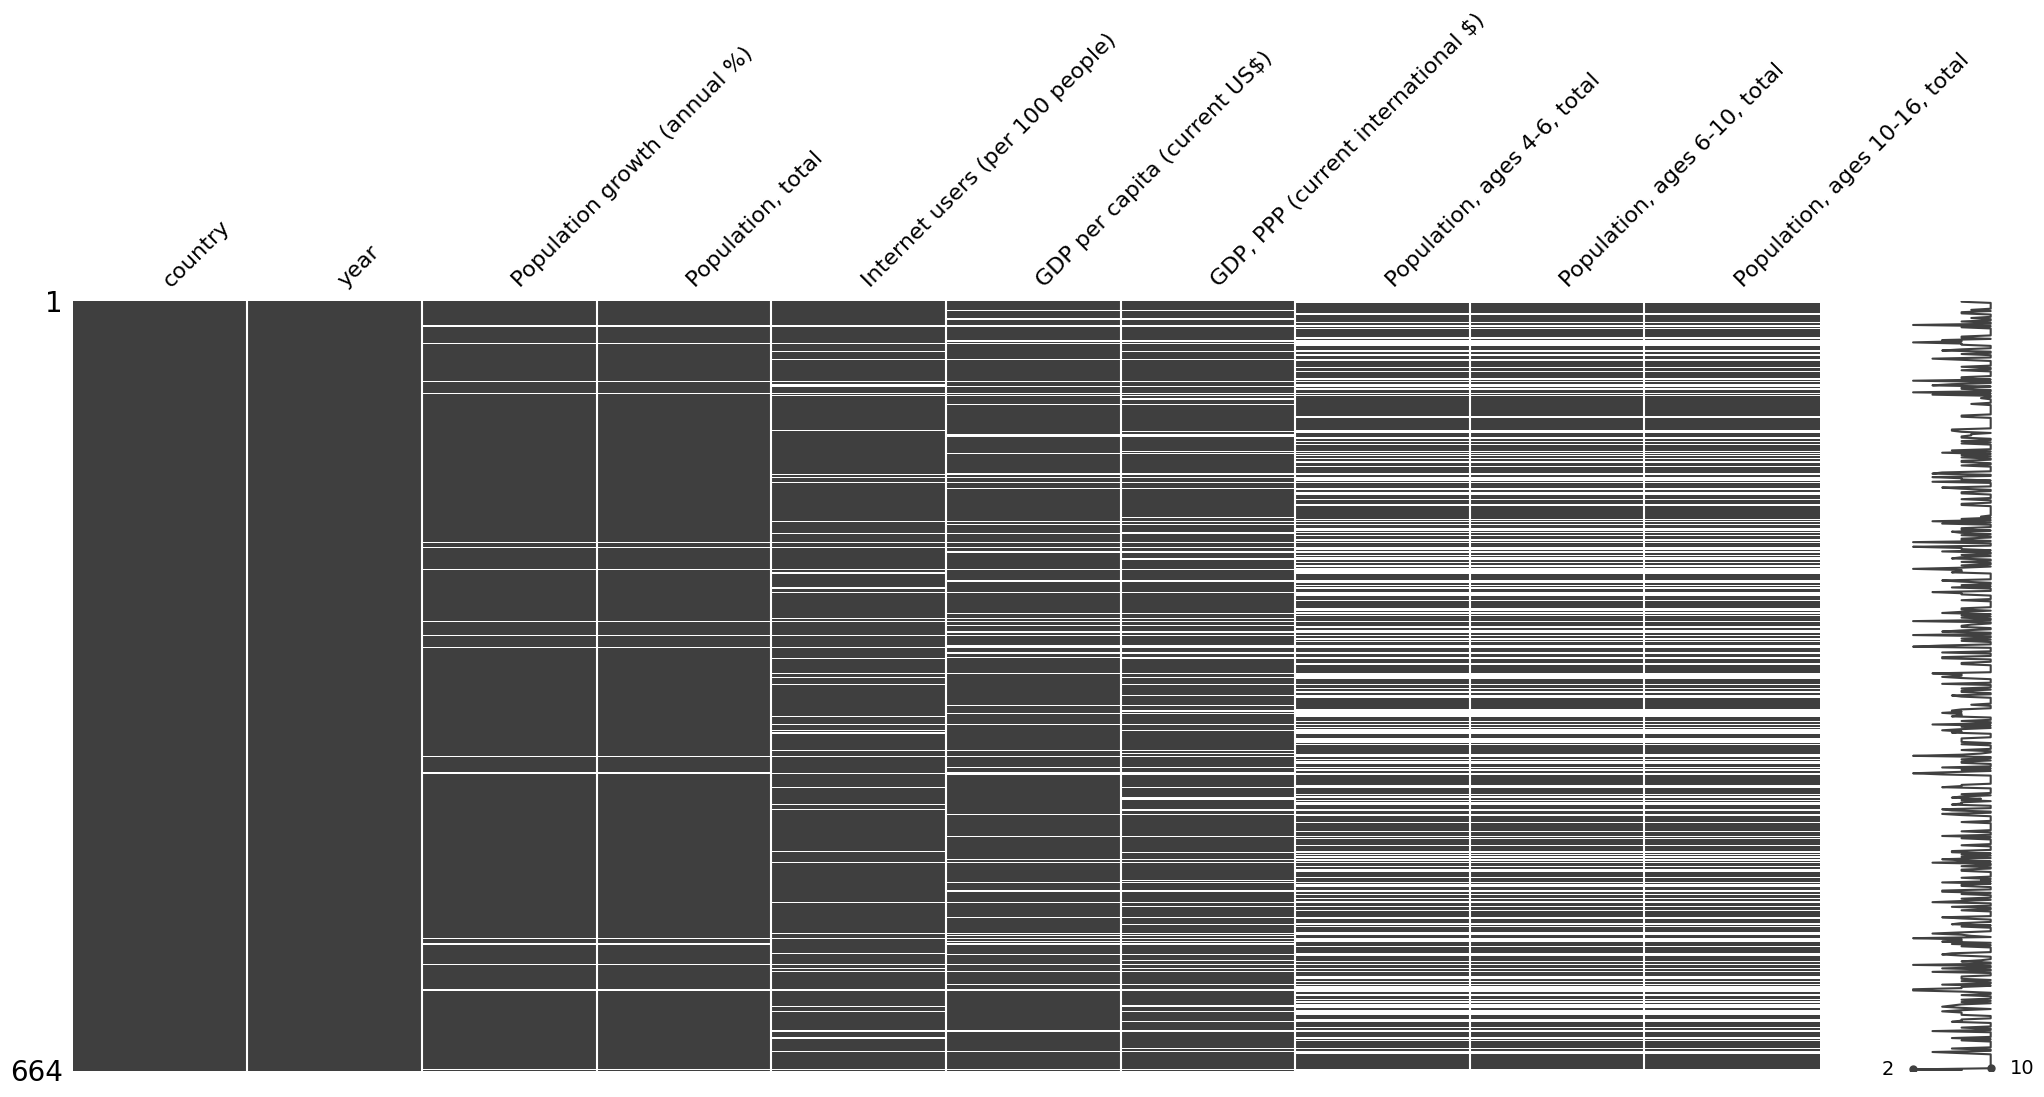

In [2414]:
import missingno as msno
import numpy as np
df.replace(0, np.nan, inplace=True)

%matplotlib inline
msno.matrix(df.sample(664))